In [4]:
import numpy as np
import numpy.random as random
import pandas as pd
import scipy as sp
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

import sklearn
import requests, zipfile
import io

import statsmodels.api as sm

__로지스틱회귀__

---

로지스틱회귀(logistic regression)는 목표변수가 숫자가 아닌 범주형 데이터를 다루는 알고리즘이다.

데이터가 어떤 범주에 속할 확률을 계산하는 작업을 분류(classification)라고 하며 이런 분류 알고리즘 중의 하나가 로지스틱회귀이다.

회귀라는 이름을 쓰지만 분류 알고리즘 중 하나이다.

분류에서는 교차엔트로피 오차(cross entropy error function)라는 목적함수를 이용한다. 이 함수의 값은 정답 범주를 예측하는 확률이 높을수록 값이 작아진다.

로지스틱 회귀분석 모형에서는 종속변수가 이항분포를 따르고 그 모수 $\mu$가 독립변수 $x$에 의존한다고 가정한다.

$$
p(y|x) = Bin(y;\mu(x), N)
$$

위 식에서 보듯이 로지스틱 함수는 $y$의 값이 특정한 구간 내의 값$(0 \sim N)$만 가질 수 있기 때문에 종속변수가 이렇나 특성을 가진 경우에 회귀분석 방법으로 쓸 수 있다.

또는 이항 분포의 특별한 경우 $(N = 1)$로 $y$가 베르누이 확률본포인 경우도 있을 수 있다. 여기에서는 베르누이 확률뷴포를 따르는 로지스틱 회귀분석만 고려하기로 한다.

$$
p(y|x) = Bern(y;\mu(x))
$$

종속변수 $y$가 0 또는 1인 분류 예측 문제를 풀 때는 $x$값을 이용하여 $\mu(x)$를 예측한 후 다음 기준에 따라 $\hat{y}$값을 출력한다.

$$
\hat{y} =
\left\{ \begin{array}{l}
     1 & \text{if} & \mu(x) \geq 0.5 \\
     0 & \text{if} & \mu(x) < 0.5
 \end{array} \right.
$$

회귀분석을 할 때는 $\hat{y}$으로 $y = 1$이 될 확률값 $\mu(x)$를 직접 사용한다.

$$
\hat{y} = \mu(x)
$$

---

<p>&nbsp;</p>

__시그모이드 함수__

---


로지스틱 회귀모형에서는 베르누의 확률분포의 모수 $\mu$가 $x$의 함수라고 가정한다. 

$\mu(x)$는 $x$에 대한 함수를 0부터 1사이의 값만 나올 수 있도록 시그모이드 함수(sigmoid function)라는 함수를 사용하여 변형한 것을 사용한다.

시그모이드 함수는 종속변수의 모든 실수 값에 대해

1. 유한한 구간 $(a, b)$ 사이의 한정된(bounded) 값을 가지고 ($a < f(x) < b$)

2. 항상 양의 기울기를 가지는 단조증가하는 ($ a > b \rightarrow f(a) > f(b)$)

함수의 집합을 말한다. 실제로는 다음과 같은 함수들이 주로 사용된다.

1. 로지스틱(Logistic) 함수

$$
logistic(z) = \sigma(z) = \frac{1}{1 + \exp(-z)}
$$

2. 하이퍼볼릭탄젠트(Hyperbolic tangent) 함수

$$
\tanh(z) = \frac{\sinh(z)}{\cosh(z)} = \frac{(e^z - e^-z)/2}{(e^z + e^-z)/2} = 2\sigma(2z) - 1
$$

3. 오차(Error)함수

$$
\text{erf}(z) = \frac{2}{\sqrt{\pi}}\int_{0}^{z}e^{-t2} dt
$$

하이퍼볼릭탄젠트함수는 로지스틱함수를위아래 방향으로 2배 늘리고 좌우 방향으로 1/2로 축소한 것과 같다.

---

<p>&nbsp;</p>

__로지스틱 함수__

---

로지스틱 함수는 음의 무한대부터 양의 무한대까지의 실수값을 0부터 1사이의 실수값으로 1 대 1 대응시키는 시그모이드 함수다. 보통 시그모이드 함수라고 하면 로지스틱 함수를 가리킨다. 로지스틱 함수는 다음 과정을 통해 정의되었다.

베르누이의 시도에서 1이 나올 확률 $\mu$와 0이 나올 확률 $1 - \mu$의 비율(ratio)을 승산비(odds ratio)라고 한다.

$$
\text{odds ratio} = \frac{\mu}{1 - \mu}
$$

0부터 1 사이의 값만 가지는 $\mu$를 승산비로 변환하면 0부터 양의 무한대까지의 값을 가질 수 있다.

승산비를 로그 변환한 것이 로짓함수(Logit function)다.

$$
z = \text{logit(odds ratio)} = \text{log}\left(\frac{\mu}{1 - \mu}\right)
$$

로짓함수의 값은 로그 변환에 의해 음의 무한대($-\infty$)부터 양의 무한대($\infty$)까지의 값을 가질 수 있다.

로지스틱함수(Logistic function)는 로짓함수의 역함수이다. 즉 음의 무한대($-\infty$)부터 양의 무한대($\infty$)까지의 값을 가지는 입력변수를 0부터 1사이의 값을 가지는 출력변수로 변환한 것이다.

$$
z = \text{logistic}(z) = \mu(z) = \frac{1}{1 + \text{exp}(-z)}
$$

---

<p>&nbsp;</p>

__선형 판별함수__

---

로지스틱함수 $\sigma(z)$를 사용하는 경우에는 $z$값과 $\mu$값은 다음과 같은 관계가 있다.

1. $z = 0$일 때 $\mu = 0.5$
2. $z > 0$일 때 $\mu > 0.5 \rightarrow \hat{y} = 1$
3. $z < 0$일 때 $\mu < 0.5 \rightarrow \hat{y} = 0$

즉 $z$가 분류 모형의 판별함수(decision function)의 역할을 한다. 로지스틱 회귀분석에는 판별함수 수식으로 선형함수를 사용한다.

$$
z = w^Tx
$$

따라서 판별 경계면도 선형이 된다.

---

<p>&nbsp;</p>

__로지스틱 회귀분석 모형의 모수 추정__

---

로지스틱 휘귀분석 모형의 모수 $w$는 최대가능도(Maximum Likelighood Estimation, MLE)방법으로 추정할 수 있다.

우선 베르누이분포의 확률밀도함수는 다음과 같다.

$$
p(y|x) = \text{Bern}(y;\mu(x;w))) = \mu(x;w)^y(1-\mu(x;w))^{1-y}
$$

$\mu$는 $w^Tx$에 로지스틱함수를 적용한 값이다.

$$
\mu(x;w) = \frac{1}{1 + \text{exp}(-w^Tx)}
$$

이 식을 대입하면 조건부 확률을 다음과 같다.

$$
p(y|x) = \left(\frac{1}{1+\text{exp}(-w^Tx)}\right)^y\left(1-\frac{1}{1+\text{exp}(-w^Tx)}\right)^{1-y}
\\
=\left(\frac{1}{1+\text{exp}(-w^Tx)}\right)^y\left(\frac{\text{exp}(-w^Tx)}{1+\text{exp}(-w^Tx)}\right)^{1-y}
$$

데이터 표본이 ${x_i,y_i}_1:N$로 여러 개 있는 경우 전체 데이터의 로그가능도 $LL$를 구하면 다음과 같다.

베르누이 확률분포의 정의에서

$$
LL = \text{log}\prod^N_{i-1}\mu(x_i;w)^{y_i}(1-\mu(x_i;w))^{1-y_i}
\\
=\sum^N_{i=1}(y_i\text{log}\mu(x_i;w)+(1-y_i)\text{log}(1-\mu(x_i;w)))
\\
=\sum^N_{i=1}(y_i\text{log}(\frac{1}{1+\text{exp}(-w^Tx_i)})+(1-y_i)\text{log}(\frac{\text{exp}(-w^Tx_i)}{1+\text{exp}(-w^Tx_i)}))
$$

가 된다.

로그 가능도를 최대화하는 $w$값을 구하기 위해 모수로 미분한다.

$$
\frac{\partial LL}{\partial w} = \sum^N_{i=1}\frac{\partial LL}{\partial\mu(x_i;w)}\frac{\partial\mu(x_i;w)}{\partial w}
$$

$LL$을 $\mu$로 미분하면

$$
\frac{\partial LL}{\partial\mu(x_i;w)} = \left(y_i\frac{1}{\mu(x_i;w)}-(1-y_i)\frac{1}{1-\mu(x_i;w)}\right)
$$

$\mu$를 $w$로 미분하면

$$
\frac{\partial \mu(x_i;w)}{\partial w} = \frac{\partial}{\partial w} \frac{1}{1 + \text{exp}(-w^Tx_i)} = \frac{\text{exp}(-w^Tx_i)}{(1 + \text{exp}(-w^Tx_i))^2}x_i = \mu(x_i;w)(1 - \mu(x:w))x_i
$$

두 식을 곱하면 그레디언트 벡터의 수식을 구할 수 있다.

$$
\frac{\partial LL}{\partial w} 
= \sum^N_{i=1}\left(y_i\frac{1}{\mu(x_i;w)} - (1-y_i)\frac{1}{1-\mu(x_i;w)}\right)\mu(x;w)(1-\mu(x_i;w))x_i
\\
= \sum^N_{i=1}(y_i(1-\mu(x_i;w))-(1-y_i)\mu(x_i;w))x_i
\\
= \sum^N_{i=1}(y_i - \mu(x_i;w))x_i
$$

그레디언트 벡터가 영벡터가 되는 모수의 값이 로그가능도를 최대화하는 값이다.
하지만 그레디언트 벡터 수식이 $w$에 대한 비선형 함수이므로 선형 모형과 같이 간단하게 그레디언트가 0이 되는 모수 $w$ 값에 대한 수식을 구할 수 없으며 수치적인 최적화 방법(numerical optimization)을 통해 반복적으로 최적 모수 $w$의 값을 구해야 한다.

---

<p>&nbsp;</p>

__수치적 최적화__

---

로그가능도 함수 $LL$을 최대화 하는 것은 다음 목적함수를 최소화 하는 것과 같다.

$$
J = -LL
$$

최대경사도(Steepst Gradient Descent)방법을 사용한다.
그레디언트 벡터는 $g_k = \frac{d}{dw}(-LL)$
이고, 이 방향으로 스텝사이즈 $\eta_k$만큼 이동한다.

$$
w_{k+1} = w_k - \eta_{k} g_k
\\
= w_k + \eta_{k} \sum^N_{i=1}(y_i - \mu(x_i;w_k))x_i
$$
---

<p>&nbsp;</p>

__StatsModels 패키지의 로지스틱 회귀__

---

1차원 독립변수를 가지는 분류문제

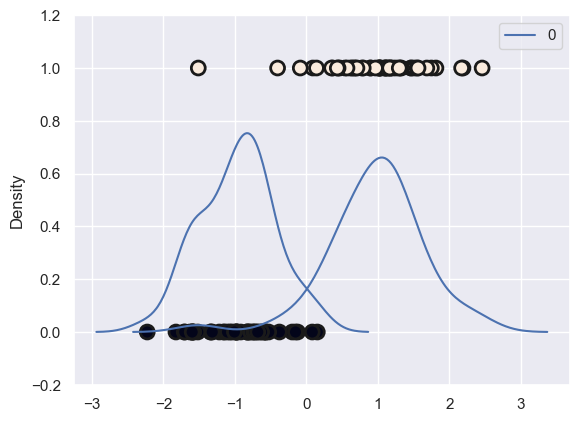

In [2]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolors='k', linewidths=2)
sns.kdeplot(X0[y == 0, :], label='y = 0')
sns.kdeplot(X0[y == 1, :], label='y = 0')
plt.ylim(-0.2, 1.2)
plt.show()

StatsModels 패키지는 베르누이 분포를 따르는 로지스틱 회귀 모형(Logit)을 제공한다. 사용방법은 OLS 클래스 사용법과 동일하다. 종속변수와 독립변수 데이터를 넣어 모형을 만들고 fit 메서드로 학습을 시킨다. fit 메서드의 disp=0 인수는 최적화 과정에서 문자열 메세지를 나타내지 않는 역할을 한다.

In [5]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 Jul 2023   Pseudo R-squ.:                  0.7679
Time:                        14:25:38   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


결과 객체에서 summary 메서드를 사용하여 리포트를 출력할 수 있다. 결과 리포트에서 판별함수의 수식이 다음과 같다는 것을 알 수 있다.

$$
\mu(x) = \sigma(4.2392x + 0.2515)
$$

따라서 $z$값 부호를 나눈 기준값은 $4.2382x + 0.2515 = 0.5$가 되는 $x$값 즉, $(0.5 - 0.2515)/4.2382$다.

predict 메서드를 사용하면 $\mu(x)$값을 출력한다.

유의확률을 감안하면 상수항의 값은 0과 마찬가지이므로 $\mu(x)$가 다음과 같다고 볼 수 있다.

$$
\mu(x) = \sigma(4.2382x)
$$

이렇게 생각하면 $z$값의 부호를 나누는 기준값은 실질적으로는 $0.5/4.2382 = 0.118$이다.


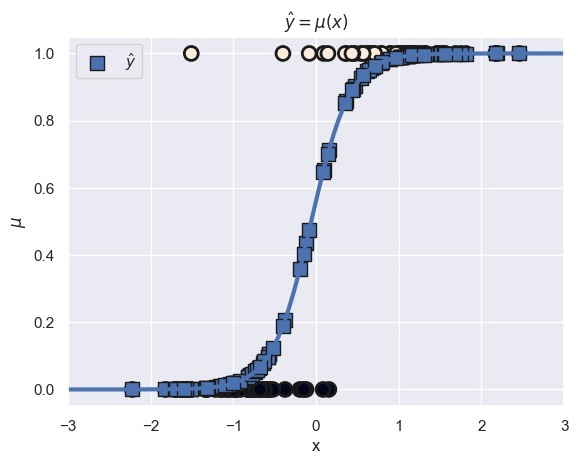

In [7]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s',
            s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()
          

---

<p>&nbsp;</p>

__판별함수__

---

Logit 모형의 결과 객체에는 fittedvalues라는 속성으로 판별함수 $z = w^Tx$ 값이 들어가 있다. 이 값을 이용하여 분류문제를 풀 수도 있다.

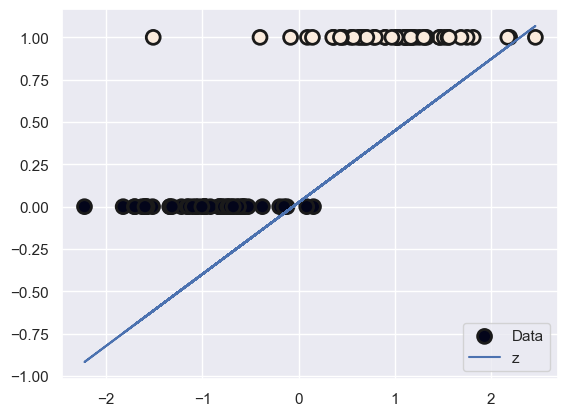

In [10]:
plt.scatter(X0, y, c=y, s=100, edgecolors="k", lw=2, label = "Data")
plt.plot(X0, logit_res.fittedvalues * 0.1, label="z")
plt.legend()
plt.show()

---

<p>&nbsp;</p>

__로지스틱 회귀 성능 측정__

---

로지스틱 회귀 성능은 맥파든 의사결정계수(McFadden pseudo R square)값으로 측정한다.

$$
R^2_{pseudo} = 1 - \frac{G^2}{G^2_0}
$$

$G^2$는 이탈도(deviance)라고 하는 양으로 다음과 같이 정의된다.

$$
G^2 = 2\sum^N_{i=1} \left( y_i \text{log}\frac{y_i}{\hat{y_i}}+(1-y_i)\text{log}\frac{1-y_i}{1-\hat{y_i}} \right)
$$

여기에서 $\hat{y}$는 $y=1$일 확률 $\mu$를 뜻한다.

$$
\hat{y_i} = \mu(x_i)
$$

이탈도는 모형이 100% 정확한 경우에는 0이 되고 모형의 성능이 나빠질수록 값이 커진다.

또한 이탈도는 로그 가능도에 음수를 취한 값과 같다.

$$
G^2 = -LL
$$

$G^2$는 현재 이탈도 이고 $G^2_0$는 귀무모형(null model)으로 측정한 이탈도다.

귀무모형이란 모든 $x$가 $y$를 예측하는데 전혀 영향을 미치지 않는 모형을 말한다. 즉, 무조건부 확률 $p(y)$에 따라 $x$에 상관없이 동일하게 $y$를 예측하는 모형을 말한다. 결국 우리가 만들 수 있는 가장 성능이 나쁜 모형이 도니다.

$$
\mu_{null} = \frac{\text{number of }Y = 1 \text{ data}}{\text{number of all data}}
$$

따라서 맥파든 의사결정계수는 가장 성능이 좋을 때는 1이 되고 가장 성능이 나쁠 때는 0이 된다.

scikit-learn 패키지의 metric 서브패키지에는 로그 손실을 계산하는 log_loss 함수가 있다. nomalize=False로 놓으면 이탈도와 같은 값을 구한다.

In [12]:
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False)

16.084

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content

adult = pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)

adult.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'martial-status',
                 'occupation', 'relationship', 'race', 'sex', 'capital-gain',
                 'capital-loss', 'hours-per-week',
                 'native-country', 'fig-50K']

print('데이터 형태:{}'.format(adult.shape))
print('결측값 수:{}'.format(adult.isnull().sum().sum()))

adult.head()

데이터 형태:(32561, 15)
결측값 수:0


,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,fig-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult.groupby('fig-50K').size()

fig-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [4]:
#fig-50K 컬럼 값이 >50K이면 1, 아니면 0인 fin_fig 변수 추가 생성
adult['fin_fig'] = adult['fig-50K'].map(lambda x: 1 if x ==' >50K' else 0)
adult.groupby('fin_fig').size()

fin_fig
0    24720
1     7841
dtype: int64

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = adult[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']]
y = adult['fin_fig']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

model = LogisticRegression()
model.fit(X_train,y_train)

print('정확도(train):{:.3f}'.format(model.score(X_train, y_train)))
print('정확도(test):{:.3f}'.format(model.score(X_test, y_test)))

정확도(train):0.797
정확도(test):0.798


In [6]:
from sklearn.preprocessing import StandardScaler

X = adult[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']]
y = adult['fin_fig']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train_std,y_train)

print('정확도(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('정확도(test):{:.3f}'.format(model.score(X_test_std, y_test)))

정확도(train):0.811
정확도(test):0.810


In [7]:
#정규화 항이 있는 회귀: 리지회귀, 라소회귀
